/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]



Type: full
Weight: 0.6541961129090814
Mean:
 [[ 4.12061774  2.15232597]
 [-0.06444685  4.71673239]] 

Covariance:
 [[[3.15535362 0.03751939]
  [0.03751939 2.28935494]]

 [[0.78752949 0.46665124]
  [0.46665124 2.78518011]]] 

Run Time: 0.013401269912719727

Type: tied
Weight: 0.5991730137202895
Mean:
 [[4.34077632 2.07201355]
 [0.18095115 4.4847606 ]] 

Covariance:
 [[2.14295832 0.16847547]
 [0.16847547 2.55041767]] 

Run Time: 0.00481104850769043

Type: diag
Weight: 0.6415057358526935
Mean:
 [[ 4.1746113   2.14352045]
 [-0.0129178   4.64171168]] 

Covariance:
 [[3.06201993 2.31887706]
 [0.84178957 2.86100954]] 

Run Time: 0.0028657913208007812

Type: spherical
Weight: 0.6158850810205949
Mean:
 [[4.25651938 2.09379313]
 [0.13506205 4.55481326]] 

Covariance:
 [2.6334646  2.02045754] 

Run Time: 0.0036339759826660156


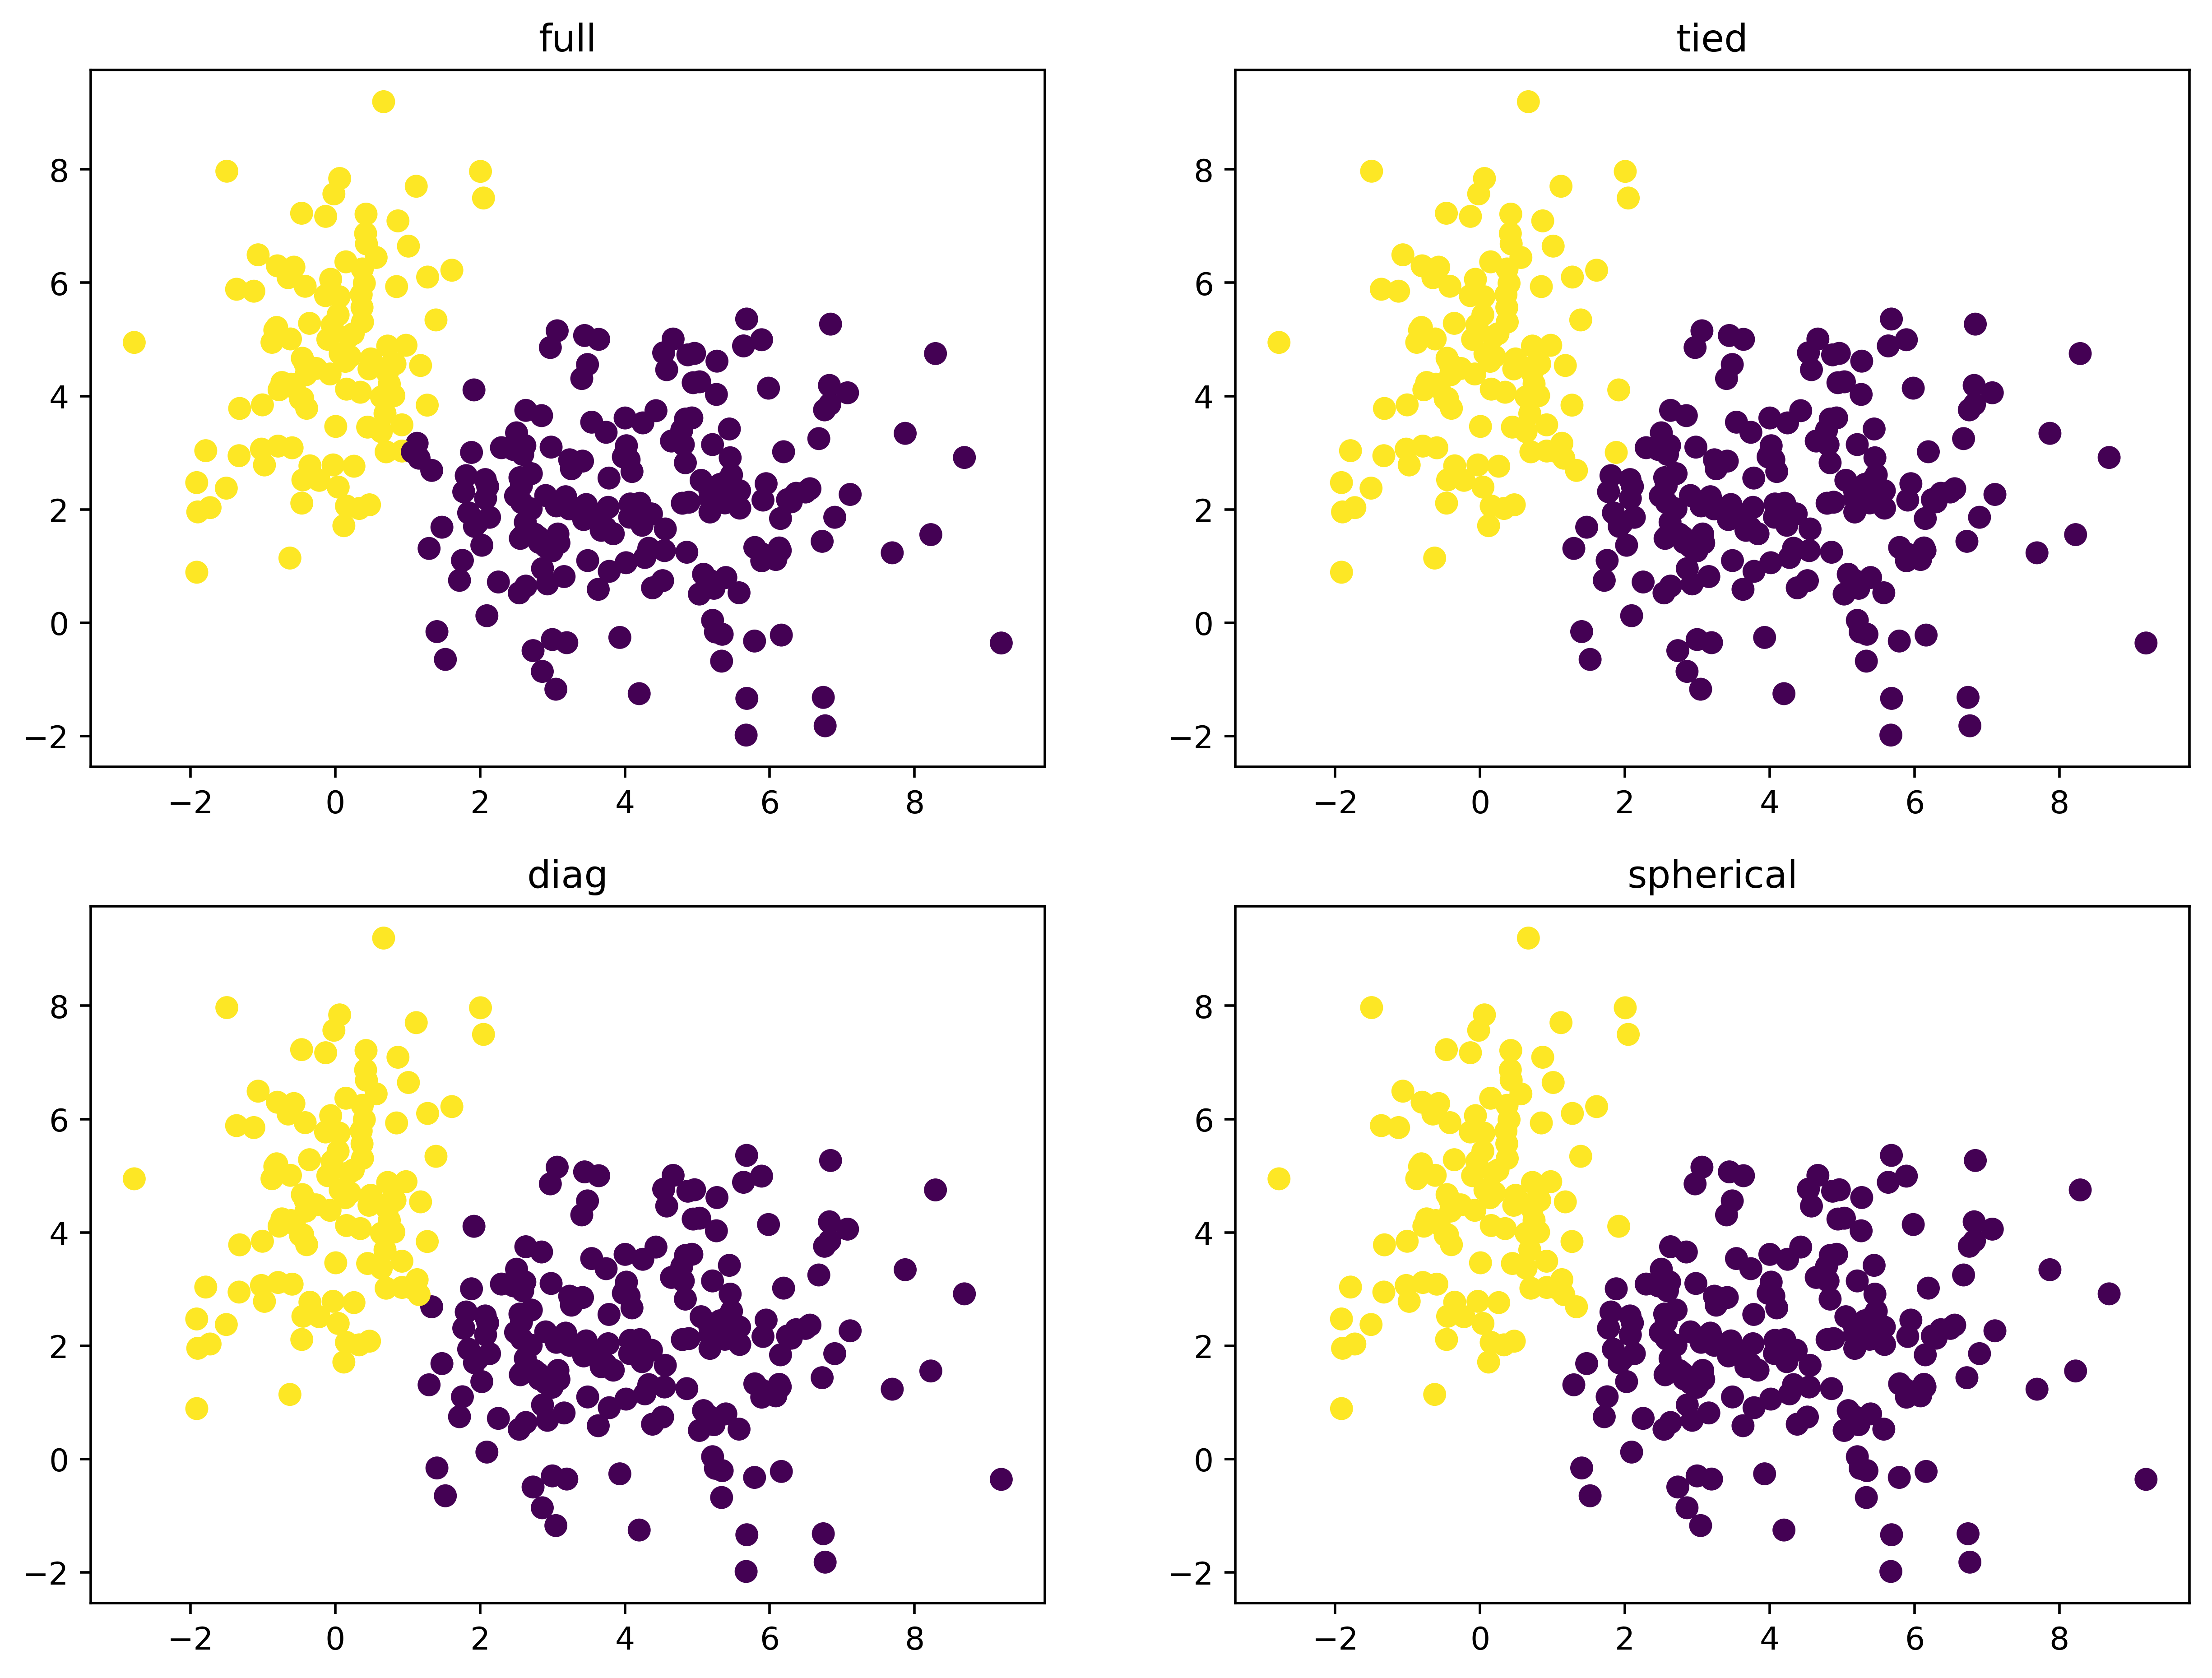

In [20]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
Type = ['full', 'tied', 'diag', 'spherical']
cov1 = np.mat("0 3;1 0")
cov2 = np.mat("0 2;3 0")
mean1 = np.array([0, 5])
mean2 = np.array([4, 2])

X = np.zeros((300, 2))
X[:100, :] = np.random.multivariate_normal(mean=mean1, cov=cov1, size=100)
X[100:, :] = np.random.multivariate_normal(mean=mean2, cov=cov2, size=200)
plt.figure(dpi=500, figsize=[12,9])
subfigure = 1
for n in Type:
    start = time.time()
    gmm = GaussianMixture(n_components=2, covariance_type=n)
    gmm.fit(X)
    label = gmm.predict(X)
    end = time.time()
    print()
    print('Type:', n)
    print('Weight:', gmm.weights_[0])
    print('Mean:\n', gmm.means_, '\n')
    print('Run Time:', end-start)
    plt.subplot(2,2,subfigure)
    subfigure += 1
    plt.title(n)
    plt.scatter(X[:, 0], X[:, 1], c=label, s=40, cmap='viridis');
plt.show()